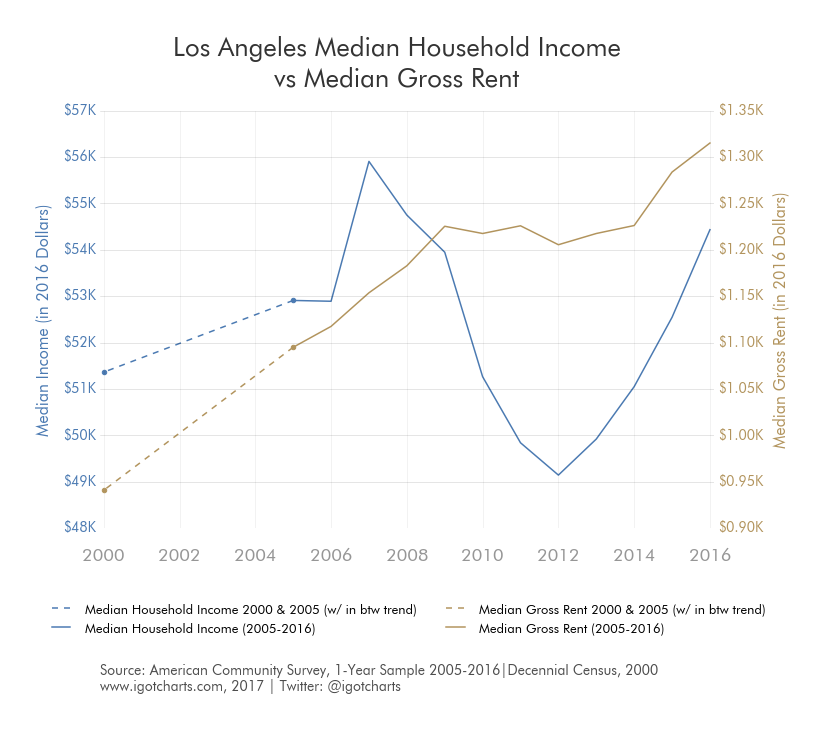

In [209]:
#import and folder set up
import os
import charts_function_list
base,data,outputs=charts_function_list.folder_setup()

#data
os.chdir(data)
rent_vs_income = pd.read_csv('los_angeles_income_rent_comparison.csv')
year_2000 = rent_vs_income.iloc[-2:,:]
rent_vs_income = rent_vs_income.iloc[0:-1]

#set up
plt.rcParams["font.family"] = "Futura Bk BT"
income_chart = charts_function_list.chart_maker('Los Angeles Median Household Income\nvs Median Gross Rent',title_size=26)
fig = income_chart.initial_fig_axis()
fig.subplots_adjust(top=.85)
ax = income_chart.axes_set_up(fig)



#set a few default variables
colors=['#4B7AB2','#B2945D']
labels = ['Median Household Income (2005-2016)','Median Household Income 2000 & 2005 (w/ in btw trend)',
         'Median Gross Rent (2005-2016)','Median Gross Rent 2000 & 2005 (w/ in btw trend)']

#define function for abbreviated but basically not actually shorter code
def line_plots(axis_,df,x_col,y_col,color,linestyle='-',label=None,linewidth=1.5):
    return(axis_.plot(df[x_col],df[y_col],linestyle=linestyle,color=color,
        linewidth=linewidth,label=label))


l1 = line_plots(ax,rent_vs_income,'Year','Median Income 2016 Dollars',color=colors[0],label=labels[0])
l2 = line_plots(ax,year_2000,'Year','Median Income 2016 Dollars',linestyle='--',color=colors[0],label = labels[1])

#secondary axis plots

ax2 = ax.twinx()
l3 = line_plots(ax2,rent_vs_income,'Year','Rent 2016 Dollars',color=colors[1],label=labels[2])
l4 = line_plots(ax2,year_2000,'Year','Rent 2016 Dollars',linestyle='--',color=colors[1],label= labels[3])


#add scatters
ax.scatter(year_2000['Year'],year_2000['Median Income 2016 Dollars'],color=colors[0],label=None)
ax2.scatter(year_2000['Year'],year_2000['Rent 2016 Dollars'],color=colors[1],label=None)



#add labels
lns = l2+l1+l4+l3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, bbox_to_anchor=(.5,-.15),loc=9,ncol=2,fontsize=13)


#tick labels and things
ax.set_yticklabels(['$'+'%s'%int(x/1000)+'K' for x in ax.get_yticks()],color=colors[0],fontsize=14)
ax2.set_yticklabels(['$'+'%.2f'%(x/1000)+'K' for x in ax2.get_yticks()],color=colors[1],fontsize=14)
income_chart.tick_params_(ax,axis='x',pad=20,fontsize=18)

#add axis labels
ax.set_ylabel('Median Income (in 2016 Dollars)',fontsize=16,color=colors[0])
ax2.set_ylabel('Median Gross Rent (in 2016 Dollars)',fontsize=16,color=colors[1])

income_chart.x_axis_setup(ax,1999.9,2016.1,2)


income_chart.citations(ax,source='Source: American Community Survey, 1-Year Sample 2005-2016|Decennial Census, 2000',
            source_y=-0.35, chart_tag_y=-0.39, fontsize=14, color='black', alpha=0.7)

os.chdir(outputs)
charts_function_list.chart_save('LA_income_v_rent')